In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import folium
from folium.plugins import MarkerCluster, HeatMap




#from pathlib import Path


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [7]:

DB_PATH = "data/restaurants.db"

conn = sqlite3.connect(DB_PATH)
rest = pd.read_sql("SELECT * FROM clean_restaurants", conn)
conn.close()

rest.head()

,place_id,place_title,rating,place_reviews_count,cuisine,price_level,address,latitude,longitude,dine_in,takeout,delivery,has_reserve_table,has_online_order,convenience_score
0,ChIJV5bWlQ3QD4gRoUL_F-onSto,Trattoria Demi,4.7,1149,Italian,2.0,"1571 Sherman Ave Ste 1, Evanston, IL 60201",42.046199,-87.681552,1,0,1,0,0,2
1,ChIJX5DfChPQD4gRo8bNsg6ci5Y,Blind Faith Cafe,4.5,945,Other,2.0,"525 Dempster St, Evanston, IL 60201",42.041332,-87.680026,1,1,1,1,1,5
2,ChIJdZVJSXrPD4gRRHBl-Pb74_g,Zentli,4.8,244,Mexican,1.0,"1813 Dempster St, Evanston, IL 60201",42.041396,-87.698339,1,1,1,1,1,5
3,ChIJHYnW_8TFD4gRr0L1N48W7Bs,Great Coast Commons,4.9,158,American,NaN,"414 Green Bay Rd #1, Kenilworth, IL 60043",42.086771,-87.717979,1,0,1,0,0,2
4,ChIJk7RgYVLFD4gRbbRnNqrjhLw,Bluestone,4.3,565,Other,2.0,"1932 Central St, Evanston, IL 60201",42.064178,-87.700304,1,1,1,1,1,5


In [8]:
conn = sqlite3.connect(DB_PATH)
rev = pd.read_sql("SELECT * FROM clean_reviews", conn)
conn.close()

rev.head()

,place_id,place_title,review_rating,review_text,reviewer_name,review_datetime
0,0x880fd00d95d69657:0xda4a27ea17ff42a1,Trattoria Demi,4.0,Overall good restaurant. The atmosphere is gre...,None,2025-10-18 15:29:46.201311
1,0x880fd00d95d69657:0xda4a27ea17ff42a1,Trattoria Demi,5.0,Trattoria Demi has become our new favorite Ita...,None,2025-05-21 15:29:46.201323
2,0x880fd00d95d69657:0xda4a27ea17ff42a1,Trattoria Demi,5.0,This is a wonderful Italian restaurant in down...,None,2025-04-21 15:29:46.201328
3,0x880fd00d95d69657:0xda4a27ea17ff42a1,Trattoria Demi,5.0,I recently had the pleasure of dining at Tratt...,None,2025-11-03 15:29:46.201330
4,0x880fd00d95d69657:0xda4a27ea17ff42a1,Trattoria Demi,5.0,They served you free breads which is delicious...,None,2025-07-20 15:29:46.201334


In [9]:
rest.info()
rest.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   place_id             59 non-null     object 
 1   place_title          59 non-null     object 
 2   rating               59 non-null     float64
 3   place_reviews_count  59 non-null     int64  
 4   cuisine              59 non-null     object 
 5   price_level          49 non-null     float64
 6   address              59 non-null     object 
 7   latitude             59 non-null     float64
 8   longitude            59 non-null     float64
 9   dine_in              59 non-null     int64  
 10  takeout              59 non-null     int64  
 11  delivery             59 non-null     int64  
 12  has_reserve_table    59 non-null     int64  
 13  has_online_order     59 non-null     int64  
 14  convenience_score    59 non-null     int64  
dtypes: float64(4), int64(7), object(4)
memory 

,place_id,place_title,rating,place_reviews_count,cuisine,price_level,address,latitude,longitude,dine_in,takeout,delivery,has_reserve_table,has_online_order,convenience_score
count,59,59,59.000000,59.000000,59,49.000000,59,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
unique,59,59,NaN,NaN,14,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ChIJV5bWlQ3QD4gRoUL_F-onSto,Trattoria Demi,NaN,NaN,Other,NaN,"1571 Sherman Ave Ste 1, Evanston, IL 60201",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,31,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.545763,706.542373,NaN,1.918367,NaN,42.046977,-87.691478,0.983051,0.525424,0.949153,0.288136,0.728814,3.474576
std,NaN,NaN,0.163287,601.530184,NaN,0.571429,NaN,0.015663,0.014537,0.130189,0.503640,0.221572,0.456782,0.448388,0.858144
min,NaN,NaN,4.100000,83.000000,NaN,1.000000,NaN,42.012218,-87.725989,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,NaN,NaN,4.400000,260.000000,NaN,2.000000,NaN,42.040582,-87.706290,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000
50%,NaN,NaN,4.600000,596.000000,NaN,2.000000,NaN,42.046663,-87.682897,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000
75%,NaN,NaN,4.700000,912.500000,NaN,2.000000,NaN,42.051950,-87.680703,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


#### 1. Landscape Overview

Number of restaurants with coordinates: 59


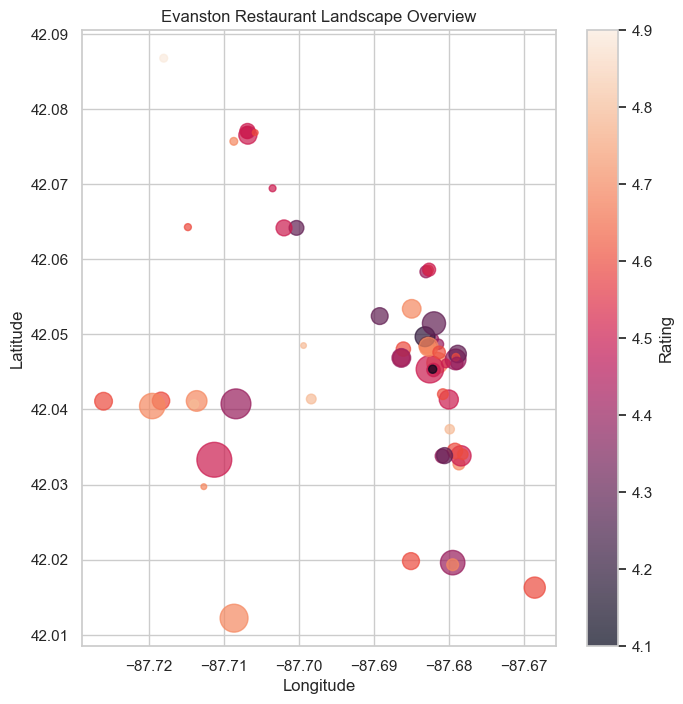

In [10]:
# 2. Make sure lat/lon are numeric
rest["latitude"] = pd.to_numeric(rest["latitude"], errors="coerce")
rest["longitude"] = pd.to_numeric(rest["longitude"], errors="coerce")

# Optionally: drop rows without coordinates
rest = rest.dropna(subset=["latitude", "longitude"])

print("Number of restaurants with coordinates:", len(rest))

# 3. Basic scatter plot: lon as x, lat as y
plt.figure(figsize=(8, 8))

sc = plt.scatter(
    rest["longitude"],
    rest["latitude"],
    c=rest["rating"],                  # color by rating
    s=rest["place_reviews_count"] / 5, # bubble size ~ #reviews
    alpha=0.7
)

plt.colorbar(sc, label="Rating")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Evanston Restaurant Landscape Overview")

plt.gca().set_aspect("equal", adjustable="box")  # keep map aspect ratio
plt.show()

In [11]:

# Ensure latitude / longitude are numeric
rest["latitude"] = pd.to_numeric(rest["latitude"], errors="coerce")
rest["longitude"] = pd.to_numeric(rest["longitude"], errors="coerce")
rest = rest.dropna(subset=["latitude", "longitude"])

# (Optional) filter to Evanston bounding box only
lat_min, lat_max = 42.02, 42.08
lon_min, lon_max = -87.72, -87.66

evan = rest[
    rest["latitude"].between(lat_min, lat_max)
    & rest["longitude"].between(lon_min, lon_max)
].copy()

print("Restaurants in Evanston:", len(evan))

# Compute map center
center_lat = evan["latitude"].mean()
center_lon = evan["longitude"].mean()

# Create base map
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=14,
    tiles="CartoDB positron"  # nice, clean background
)

# Add clustered markers
marker_cluster = MarkerCluster().add_to(m)

def rating_to_color(r):
    """Simple color mapping based on rating."""
    try:
        r = float(r)
    except (TypeError, ValueError):
        return "gray"
    if r >= 4.5:
        return "green"
    elif r >= 4.0:
        return "blue"
    elif r >= 3.5:
        return "orange"
    else:
        return "red"

for _, row in evan.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    name = row.get("place_title", "Unknown")
    rating = row.get("rating", "N/A")
    reviews = row.get("place_reviews_count", "N/A")
    price = row.get("place_price", "")
    cuisine = row.get("place_type", "")
    addr = row.get("address", "")
    
    popup_html = f"""
    <b>{name}</b><br>
    Rating: {rating} ⭐ ({reviews} reviews)<br>
    Price: {price}<br>
    Type: {cuisine}<br>
    Address: {addr}
    """

    folium.CircleMarker(
        location=[lat, lon],
        radius=6,
        color=rating_to_color(rating),
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(popup_html, max_width=300),
    ).add_to(marker_cluster)

#HeatMap layer (density / popularity)
evan["place_reviews_count"] = pd.to_numeric(
    evan.get("place_reviews_count"), errors="coerce"
).fillna(0)
evan["rating"] = pd.to_numeric(evan.get("rating"), errors="coerce")

# A simple "popularity weight": log(1+reviews) * (rating / 5)
evan["popularity_weight"] = (
    np.log1p(evan["place_reviews_count"]) * (evan["rating"] / 5.0)
).fillna(0)

heat_data = [
    [row["latitude"], row["longitude"], row["popularity_weight"]]
    for _, row in evan.iterrows()
]

HeatMap(
    heat_data,
    name="Popularity HeatMap",
    radius=18,      # radius of the point 
    blur=15,
    max_zoom=17,
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display map
m

Restaurants in Evanston: 52


#### 2. Quality vs. Popularity

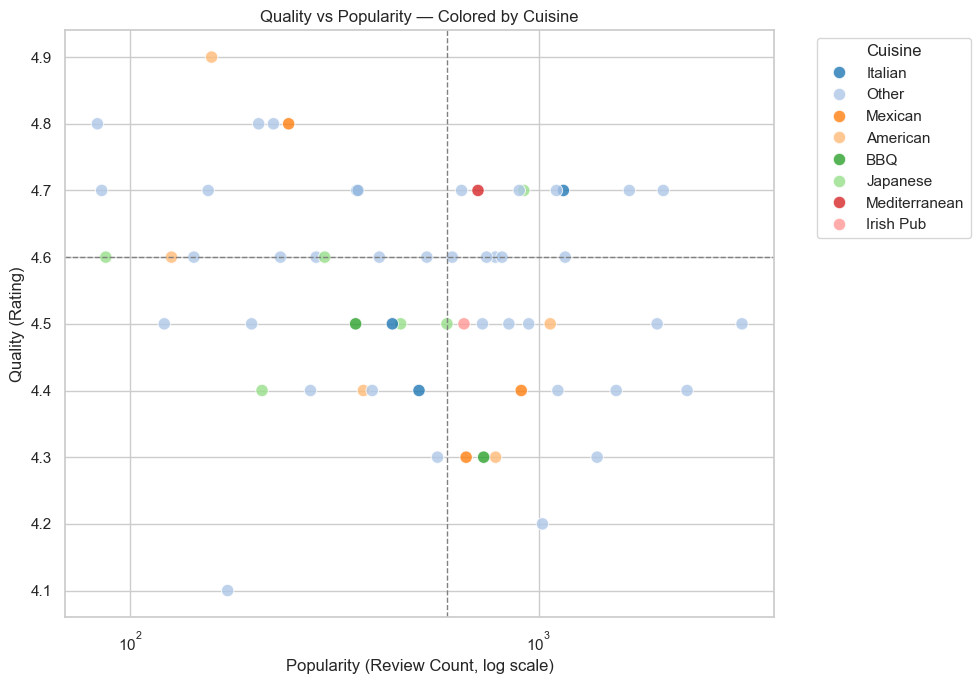

In [12]:
# Quality VS. Popularity 
df = rest.copy()   # clean_restaurants

# Filter out missing values
df_plot = df.dropna(subset=["rating", "place_reviews_count", "cuisine"]).copy()

# Keep restaurants with at least a few reviews
df_plot = df_plot[df_plot["place_reviews_count"] > 3]

# Use top cuisines (to avoid too many legend items)
top_cuisines = df_plot["cuisine"].value_counts().head(8).index
df_plot["cuisine_simplified"] = df_plot["cuisine"].where(
    df_plot["cuisine"].isin(top_cuisines),
    "Other"
)

# Compute medians (for quadrant reference lines)
rating_med = df_plot["rating"].median()
reviews_med = df_plot["place_reviews_count"].median()

plt.figure(figsize=(10, 7))

sns.scatterplot(
    data=df_plot,
    x="place_reviews_count",
    y="rating",
    hue="cuisine_simplified",
    palette="tab20",
    s=80,
    alpha=0.8
)

# Quadrant lines
plt.axhline(rating_med, color="grey", linestyle="--", linewidth=1)
plt.axvline(reviews_med, color="grey", linestyle="--", linewidth=1)

plt.xscale("log")   # review count skewed → log scale helps visualization
plt.xlabel("Popularity (Review Count, log scale)")
plt.ylabel("Quality (Rating)")
plt.title("Quality vs Popularity — Colored by Cuisine")

plt.legend(title="Cuisine", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [13]:
import statsmodels.api as sm

df = rest.copy()

# keep reviews cont >0
df = df[(df["place_reviews_count"] > 0) & df["rating"].notna()].copy()

# predict rating use log(review_count)
X = sm.add_constant(np.log1p(df["place_reviews_count"]))
y = df["rating"]

model = sm.OLS(y, X).fit()

df["expected_rating"] = model.predict(X)
df["rating_premium"] = df["rating"] - df["expected_rating"]

df[["place_title", "rating", "expected_rating", "rating_premium"]].head()

,place_title,rating,expected_rating,rating_premium
0,Trattoria Demi,4.7,4.506956,0.193044
1,Blind Faith Cafe,4.5,4.516107,-0.016107
2,Zentli,4.8,4.579419,0.220581
3,Great Coast Commons,4.9,4.599681,0.300319
4,Bluestone,4.3,4.540179,-0.240179


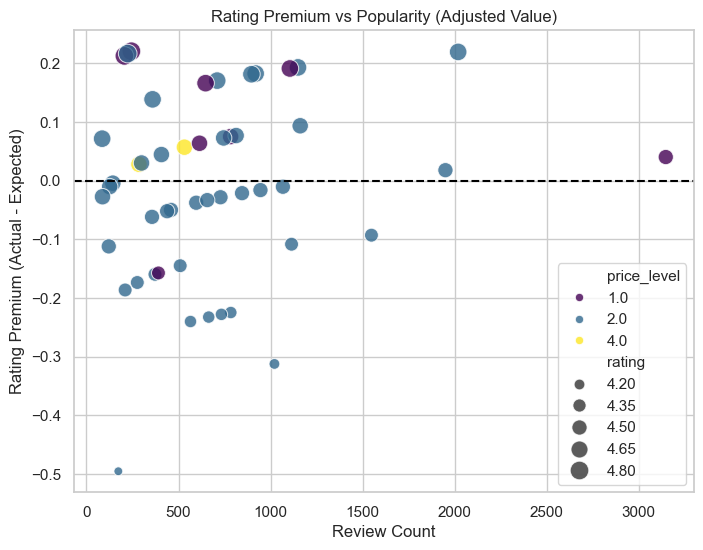

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="place_reviews_count",
    y="rating_premium",
    hue="price_level",
    size="rating",
    sizes=(40, 200),
    palette="viridis",
    alpha=0.8
)

plt.axhline(0, color="black", linestyle="--")
plt.title("Rating Premium vs Popularity (Adjusted Value)")
plt.xlabel("Review Count")
plt.ylabel("Rating Premium (Actual - Expected)")
plt.show()

In [19]:
# top5 popular restaurants

rev["review_datetime"] = pd.to_datetime(rev["review_datetime"], errors="coerce")

rev = rev.dropna(subset=["review_datetime", "review_rating"])

top5 = (
    rest.sort_values("place_reviews_count", ascending=False)
        .head(5)["place_title"]
        .tolist()
)

top5

['Dengeos - Skokie',
 'Kabul House Restaurant',
 'Al Safa Mandi House',
 'Cupitol Coffee & Eatery (Evanston)',
 'Jarasa Kabob - Skokie']

In [20]:
rest.columns

Index(['place_id', 'place_title', 'rating', 'place_reviews_count', 'cuisine',
       'price_level', 'address', 'latitude', 'longitude', 'dine_in', 'takeout',
       'delivery', 'has_reserve_table', 'has_online_order',
       'convenience_score'],
      dtype='object')

In [21]:
# top 5 rating restaurants
top5 = (
    rest.sort_values("rating", ascending=False)
        .head(5)["place_title"]
        .tolist()
)

top5

['Great Coast Commons',
 'Zentli',
 'Papa Bop',
 'Spice Restaurant',
 'Monkey King Jianbing']

In [22]:
df.columns

Index(['place_id', 'place_title', 'rating', 'place_reviews_count', 'cuisine',
       'price_level', 'address', 'latitude', 'longitude', 'dine_in', 'takeout',
       'delivery', 'has_reserve_table', 'has_online_order',
       'convenience_score', 'expected_rating', 'rating_premium'],
      dtype='object')

#### 3. Convenience Features 

In [23]:
dfc = df.copy()

features = {
    "Dine-In": "dine_in",
    "Takeout": "takeout",
    "Online-Order":'has_online_order',
    "Delivery": "delivery",
    "Need Reserve": 'has_reserve_table'
    
}

# convert to boolean
for pretty, col in features.items():
    dfc[col] = dfc[col].astype(bool)

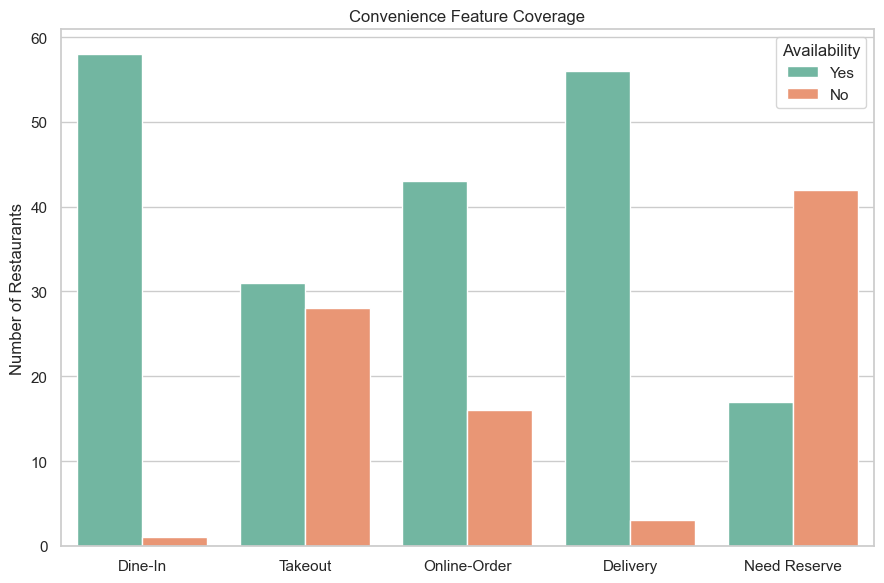

In [24]:
coverage = []

for pretty, col in features.items():
    total = len(dfc)
    yes_count = dfc[col].sum()
    no_count = total - yes_count
    coverage.append([pretty, "Yes", yes_count])
    coverage.append([pretty, "No", no_count])

coverage_df = pd.DataFrame(coverage, columns=["Feature", "Availability", "Count"])

plt.figure(figsize=(9, 6))
sns.barplot(
    data=coverage_df,
    x="Feature",
    y="Count",
    hue="Availability",
    palette="Set2"
)
plt.title("Convenience Feature Coverage")
plt.ylabel("Number of Restaurants")
plt.xlabel("")
plt.tight_layout()
plt.show()

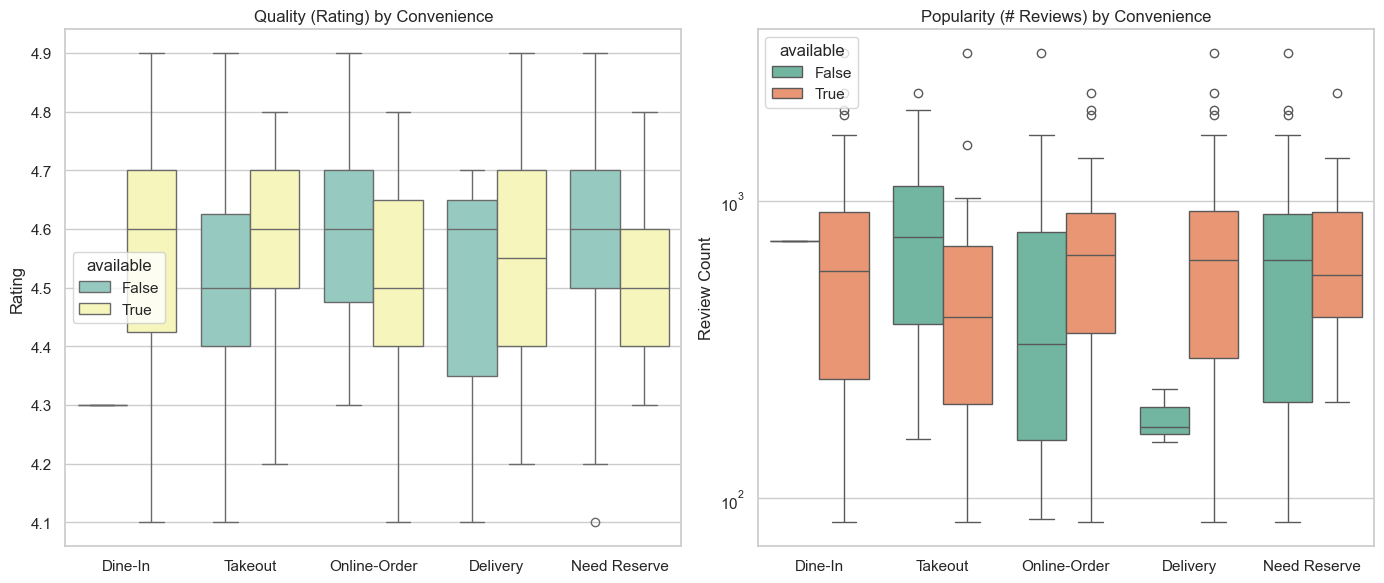

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Rating impact
rating_melt = dfc.melt(
    id_vars="rating",
    value_vars=list(features.values()),
    var_name="feature",
    value_name="available"
)

rating_melt["feature"] = rating_melt["feature"].map(
    {v: k for k, v in features.items()}
)

sns.boxplot(
    data=rating_melt,
    x="feature",
    y="rating",
    hue="available",
    palette="Set3",
    ax=axes[0]
)
axes[0].set_title("Quality (Rating) by Convenience")
axes[0].set_xlabel("")
axes[0].set_ylabel("Rating")


# Right: Popularity impact
pop_melt = dfc.melt(
    id_vars="place_reviews_count",
    value_vars=list(features.values()),
    var_name="feature",
    value_name="available"
)

pop_melt["feature"] = pop_melt["feature"].map(
    {v: k for k, v in features.items()}
)

sns.boxplot(
    data=pop_melt,
    x="feature",
    y="place_reviews_count",
    hue="available",
    palette="Set2",
    ax=axes[1]
)
axes[1].set_title("Popularity (# Reviews) by Convenience")
axes[1].set_xlabel("")
axes[1].set_ylabel("Review Count")
axes[1].set_yscale("log")

plt.tight_layout()
plt.show()

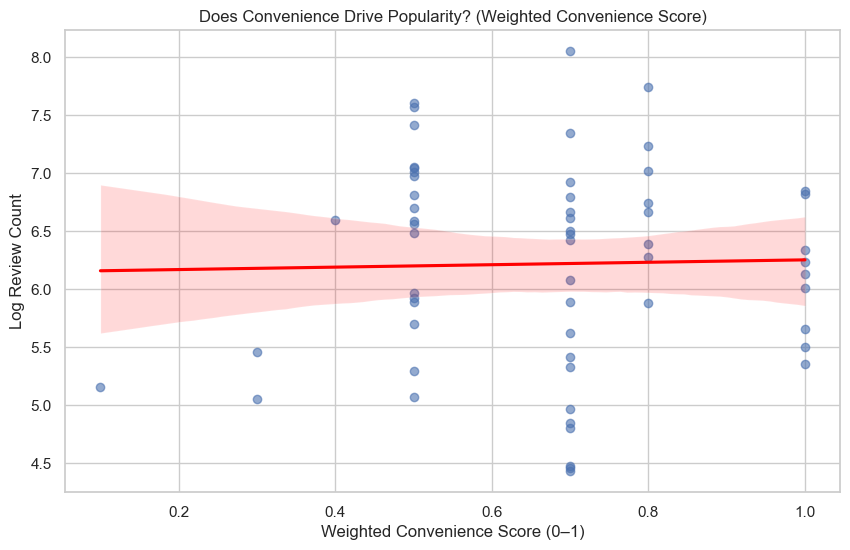

In [27]:
df["weighted_conv"] = (
    df["delivery"].fillna(False).astype(int) * 0.4 +
    df["takeout"].fillna(False).astype(int) * 0.2 +
    df["dine_in"].fillna(False).astype(int) * 0.1 +
    df["has_reserve_table"].fillna(False).astype(int) * 0.3
)

plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x="weighted_conv",
    y=np.log1p(df["place_reviews_count"]),  
    scatter_kws={"alpha":0.6},
    line_kws={"color":"red"}
)

plt.title("Does Convenience Drive Popularity? (Weighted Convenience Score)")
plt.xlabel("Weighted Convenience Score (0–1)")
plt.ylabel("Log Review Count")
plt.show()

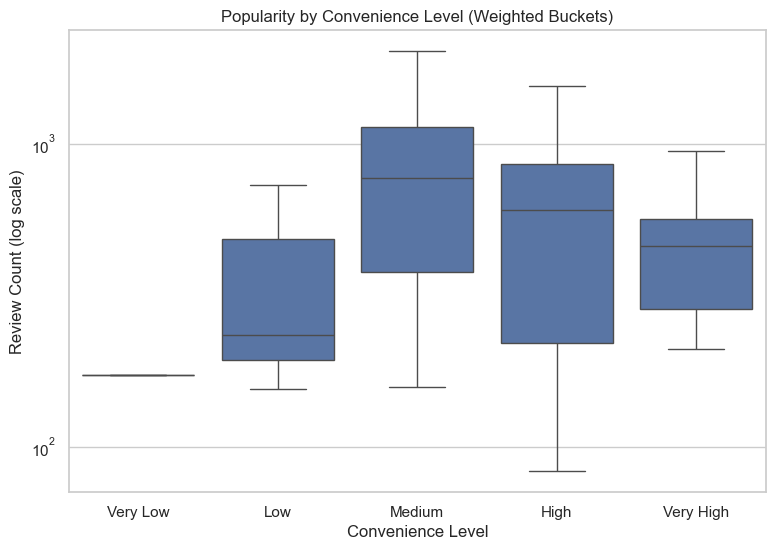

In [28]:
df["conv_bucket"] = pd.cut(
    df["weighted_conv"],
    bins=[0,0.2,0.4,0.6,0.8,1.0],
    labels=["Very Low","Low","Medium","High","Very High"]
)

plt.figure(figsize=(9,6))
sns.boxplot(
    data=df, 
    x="conv_bucket",
    y="place_reviews_count",
    showfliers=False
)
plt.yscale("log")
plt.title("Popularity by Convenience Level (Weighted Buckets)")
plt.xlabel("Convenience Level")
plt.ylabel("Review Count (log scale)")
plt.show()

#### 4. Price/Value 

In [30]:
dfv = rest.copy()

dfv = dfv.dropna(subset=["cuisine", "price_level", "rating"])
dfv["price_level"] = pd.to_numeric(dfv["price_level"], errors="coerce")
dfv["rating"] = pd.to_numeric(dfv["rating"], errors="coerce")


dfv["rel_price"] = dfv["price_level"] 

dfv = dfv.dropna(subset=["rel_price"])

dfv["value_score"] = dfv["rating"] / dfv["rel_price"]

agg = dfv.groupby("cuisine").agg(
    avg_rating=("rating", "mean"),
    avg_price_level=("price_level", "mean"),
    value_score=("value_score", "mean"),
    count=("cuisine", "count"),
).reset_index()

agg = agg.sort_values("value_score", ascending=False)
#agg.head()

In [31]:
min(rest["price_level"])

1.0

In [32]:
# top 10 value Restaurants ( high premium /reasonable price)

top_10 = dfv.sort_values("value_score", ascending=  False).head(10)
top_10['place_title']

2                              Zentli
23               Monkey King Jianbing
28                        10Q Chicken
20                      Herm's Palace
41            Cross-Rhodes Restaurant
24                          Poochie’s
48                   Dengeos - Skokie
31    La Cocinita Restaurant Evanston
39                           Papa Bop
50                Al Safa Mandi House
Name: place_title, dtype: object

/var/folders/t6/kwbkjxm57p9bb66gkdx0_xl40000gn/T/ipykernel_19536/1985989317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


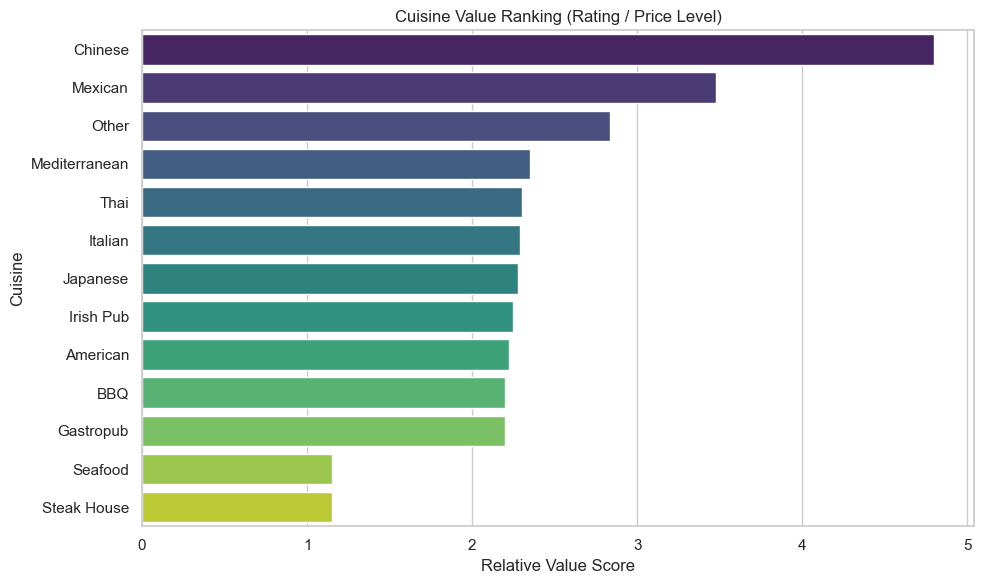

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=agg,
    x="value_score",
    y="cuisine",
    palette="viridis"
)
plt.title("Cuisine Value Ranking (Rating / Price Level)")
plt.xlabel("Relative Value Score")
plt.ylabel("Cuisine")
plt.tight_layout()
plt.show()

Some cuisines like Chinese or Thai appear to have high value scores due to a small sample size in this dataset.

#### 5. Recent signals

In [34]:
rev_clean = rev.dropna(subset=["review_datetime", "review_rating"])

# take last 7 reviews per restaurant
rev_clean = rev_clean.sort_values(["place_title", "review_datetime"])


recent_avg = (
    rev_clean.groupby("place_title")
    .tail(7)                                      # last 7 reviews
    .groupby("place_title")["review_rating"]
    .mean()
    .reset_index(name="recent_avg_rating")
    .sort_values("recent_avg_rating", ascending=False)
)

recent_avg.head(20)

,place_title,recent_avg_rating
3,Celtic Knot Public House,5.000000
18,Zentli,5.000000
11,Spice Restaurant,5.000000
6,Great Coast Commons,4.857143
12,Stacked and Folded,4.857143
15,The Fat Shallot Evanston,4.857143
5,Five & Dime,4.714286
7,Habibi In Mediterranean Grill-Evanston,4.714286
14,Tapas Barcelona,4.714286
2,Carlos & Carlos Restaurant,4.666667


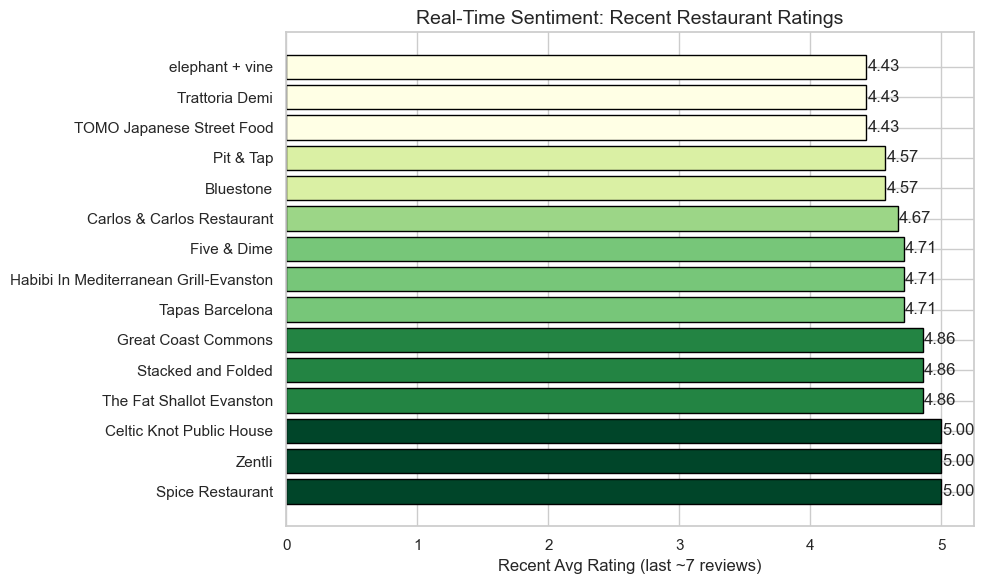

In [35]:
top15 = recent_avg.head(15).copy()
top15 = top15.sort_values("recent_avg_rating")

plt.figure(figsize=(10, 6))

norm = plt.Normalize(top15["recent_avg_rating"].min(), top15["recent_avg_rating"].max())
colors = plt.cm.YlGn(norm(top15["recent_avg_rating"]))

plt.barh(
    top15["place_title"], 
    top15["recent_avg_rating"], 
    color=colors, 
    edgecolor="black"
)

plt.xlabel("Recent Avg Rating (last ~7 reviews)")
plt.title("Real-Time Sentiment: Recent Restaurant Ratings", fontsize=14)

# Add annotation for exact numbers
for idx, val in enumerate(top15["recent_avg_rating"]):
    plt.text(val + 0.01, idx, f"{val:.2f}", va="center")

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [36]:
# assume rest = clean_restaurants table merged properly
rest_min = rest[["place_title", "rating"]].drop_duplicates()

sentiment_shift = recent_avg.merge(rest_min, on="place_title", how="left")
sentiment_shift["shift"] = sentiment_shift["recent_avg_rating"] - sentiment_shift["rating"]

sentiment_shift = sentiment_shift.sort_values("shift", ascending=False)
sentiment_shift.head(20)

,place_title,recent_avg_rating,rating,shift
0,Celtic Knot Public House,5.000000,4.5,0.500000
4,Stacked and Folded,4.857143,4.4,0.457143
8,Tapas Barcelona,4.714286,4.4,0.314286
11,Bluestone,4.571429,4.3,0.271429
5,The Fat Shallot Evanston,4.857143,4.6,0.257143
6,Five & Dime,4.714286,4.5,0.214286
2,Spice Restaurant,5.000000,4.8,0.200000
1,Zentli,5.000000,4.8,0.200000
10,Pit & Tap,4.571429,4.5,0.071429
12,elephant + vine,4.428571,4.4,0.028571


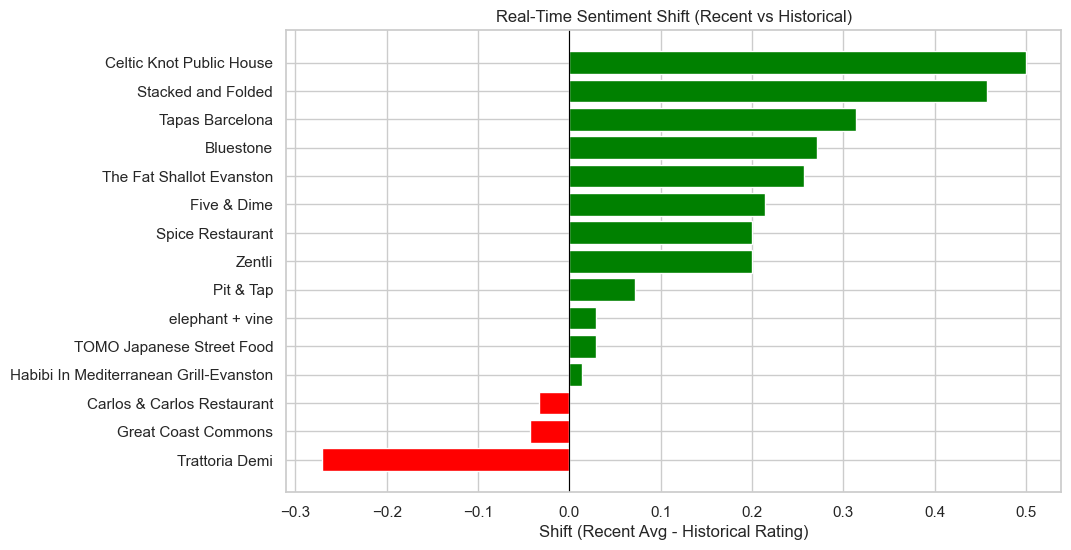

In [37]:
plt.figure(figsize=(10, 6))

top_shift = sentiment_shift.sort_values("shift").tail(15)

colors = top_shift["shift"].apply(lambda x: "green" if x > 0 else "red")

plt.barh(top_shift["place_title"], top_shift["shift"], color=colors)
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Real-Time Sentiment Shift (Recent vs Historical)")
plt.xlabel("Shift (Recent Avg - Historical Rating)")
plt.show()

“We only used the most recent ~7 reviews per restaurant,
so textual analysis is used as qualitative support rather than heavy NLP.”

#### 6. Keyword/Sentiment-ish

Rising: ['Celtic Knot Public House', 'Stacked and Folded', 'Tapas Barcelona', 'Bluestone', 'The Fat Shallot Evanston']
Falling: ['Trattoria Demi', 'Prairie Moon', 'Torino', 'Blind Faith Cafe', 'Cupitol Coffee & Eatery (Evanston)', 'Picnic']
Rising keyword lift:
cozy         0.094244
friendly     0.076753
gem          0.043810
wait         0.004924
slow         0.000000
authentic   -0.014094
family      -0.020717
expensive   -0.033113
service     -0.080489
fresh       -0.087791
dtype: float64

Falling keyword lift:
fresh        0.060927
expensive    0.033554
family       0.020309
cozy         0.007064
slow         0.000000
wait        -0.001913
friendly    -0.005298
gem         -0.010890
authentic   -0.017513
service     -0.066814
dtype: float64


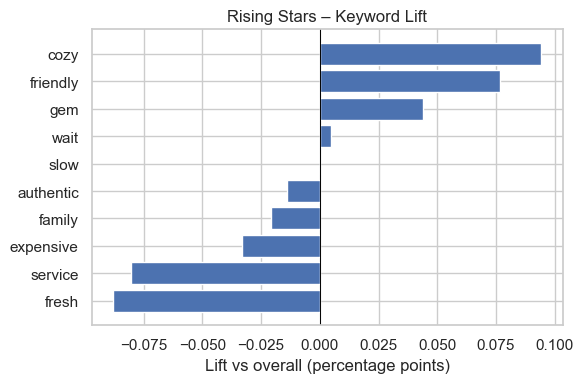

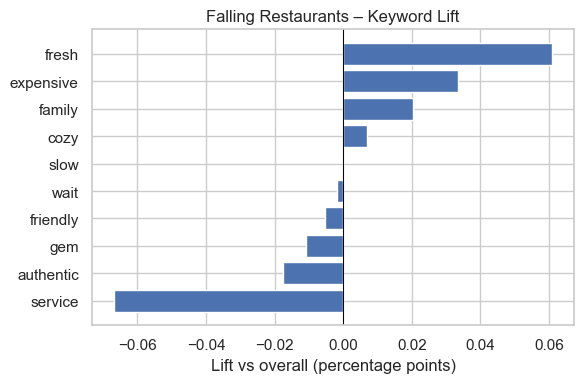

In [38]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# ============================================
# 1. Define groups: rising & falling
# ============================================

# Rising stars: recent rating clearly higher than historical
rising = sentiment_shift.loc[sentiment_shift["shift"] >= 0.25, "place_title"].tolist()

# Falling restaurants: recent rating clearly lower than historical
falling = sentiment_shift.loc[sentiment_shift["shift"] <= -0.25, "place_title"].tolist()

print("Rising:", rising)
print("Falling:", falling)

# ============================================
# 2. Clean review text
# ============================================

def clean_text(x):
    """Lowercase and remove non-letter characters."""
    if not isinstance(x, str):
        return ""
    x = x.lower()
    x = re.sub(r"[^a-zA-Z ]", " ", x)
    return x

# Make sure we only keep rows with text
rev_clean = rev.dropna(subset=["review_text"]).copy()
rev_clean["clean"] = rev_clean["review_text"].apply(clean_text)

# ============================================
# 3. Define keywords we care about
#    (you can add / remove words here)
# ============================================

keywords = [
    "cozy", "gem", "authentic", "family", "fresh",
    "friendly", "service", "wait", "slow", "expensive"
]

def keyword_rate(df):
    """
    For each keyword, compute the share of reviews
    that contain this keyword at least once.
    """
    if df.empty:
        return pd.Series({kw: 0.0 for kw in keywords})

    total = len(df)
    rates = {}
    for kw in keywords:
        rates[kw] = (df["clean"].str.contains(rf"\b{kw}\b")).mean()
    return pd.Series(rates)

# Overall baseline
overall_rate = keyword_rate(rev_clean)

# Rising group reviews
rev_rising = rev_clean[rev_clean["place_title"].isin(rising)]
rising_rate = keyword_rate(rev_rising)

# Falling group reviews
rev_falling = rev_clean[rev_clean["place_title"].isin(falling)]
falling_rate = keyword_rate(rev_falling)

# ============================================
# 4. Compute "lift" = group_rate - overall_rate
# ============================================

lift_rising = (rising_rate - overall_rate).sort_values(ascending=False)
lift_falling = (falling_rate - overall_rate).sort_values(ascending=False)

print("Rising keyword lift:")
print(lift_rising)

print("\nFalling keyword lift:")
print(lift_falling)

# ============================================
# 5. Plot (optional): top keyword lifts
# ============================================

def plot_lift(lift_series, title):
    top = lift_series.head(10)
    plt.figure(figsize=(6, 4))
    plt.barh(top.index, top.values)
    plt.axvline(0, color="black", linewidth=0.7)
    plt.title(title)
    plt.xlabel("Lift vs overall (percentage points)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_lift(lift_rising,  "Rising Stars – Keyword Lift")
plot_lift(lift_falling, "Falling Restaurants – Keyword Lift")